# PROBLEM 2.1

#### RENE L. PRINCIPE JR              
###### 2015-04622

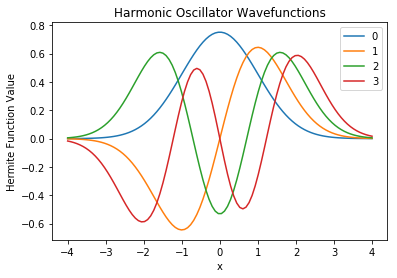

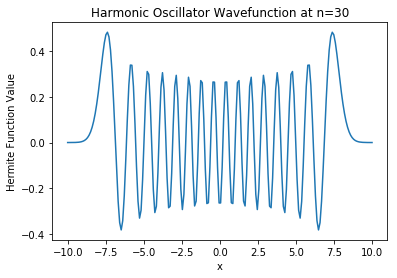

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  8 7:34:06 2018

@author: Rene
"""

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from math import factorial

#GENERATE A HERMITE FUNCTION

def Hermite(n,x):
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        return 2*x*Hermite(n-1,x)-2*(n-1)*Hermite(n-2,x)

def phi(n,x):
    return 1/sqrt(2**n*factorial(n)*sqrt(np.pi)) * np.exp(-x**2/2) * Hermite(n,x)


x = np.linspace(-4,4,100)
n = [0,1,2,3]

#PLOTTING THE HERMITE POLYNOMIALS AT N=0,1,2,3

for i in n:
    plt.plot(x,phi(i,x),label=i)

plt.legend()
plt.xlabel("x")
plt.ylabel("Hermite Function Value")
plt.title("Harmonic Oscillator Wavefunctions")
plt.show()

#PLOTTING THE HERMITE POLYNOMIALS AT N=30

x = np.linspace(-10,10,200)
plt.plot(x,phi(30,x))
plt.xlabel("x")
plt.ylabel("Hermite Function Value")
plt.title("Harmonic Oscillator Wavefunction at n=30")
plt.show()


In [11]:
uncertainty = lambda n,x: x**2*phi(n,x)**2

from numpy import ones,copy,cos,tan,pi,linspace

#IMPORTED A PYTHON CODE: GAUSSXW.PY FROM RESOURCES

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

N = 100
x,w = gaussxw(N)

#INTEGRALS OVER INFINITE RANGE TECHNIQUE

def x__2(n):
    a = -1
    b = 1
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    y = (1 + xp**2)/(1-xp**2)**2*uncertainty(n,xp/(1-xp**2))
    s = sum(y*wp)
    return s

n = 5
RMS = sqrt(sum([x_sq(ni)**2 for ni in range(1,n)]))
print(RMS)


a = -pi/2
b = pi/2
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

n = 5
y = uncertainty(n,tan(xp))/cos(xp)**2
s = sum(y*wp)
print(s)

a = -10
b = 10
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

n = 5
y = uncertainty(n,xp)
s = sum(y*wp)
print(s)

6.403124226579485
5.499999999380583
5.500000000000001
